In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import warnings
from tensorflow import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import layers
from tensorflow.keras.applications import VGG16

In [2]:
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', titleweight='bold', titlesize=18, titlepad=10, labelsize='large')
plt.rc('image', cmap='magma')
warnings.filterwarnings("ignore")

In [3]:
def seed_set(seed=31415):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC-OPS'] = '1'
seed_set(31415)

In [4]:
train_dir = r'C:\Users\Helen\Nexforce_projects\planets\train'
valid_dir = r'C:\Users\Helen\Nexforce_projects\planets\valid'  

In [5]:
print("Training directory:", train_dir)
print("Validation directory:", valid_dir)

Training directory: C:\Users\Helen\Nexforce_projects\planets\train
Validation directory: C:\Users\Helen\Nexforce_projects\planets\valid


In [6]:
ds_train_ = image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='categorical',
    image_size=[128, 128],
    interpolation='nearest',
    batch_size=64,
    shuffle=True,
)

Found 368 files belonging to 8 classes.


In [7]:
ds_valid_ = image_dataset_from_directory(
    valid_dir,
    labels='inferred',
    label_mode='categorical',
    image_size=[128, 128],
    interpolation='nearest',
    batch_size=64,
    shuffle=False,
)


Found 105 files belonging to 8 classes.


In [8]:
def convert_to_float(image, label):
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    return image, label

AUTOTUNE = tf.data.experimental.AUTOTUNE
ds_train = (
    ds_train_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)
ds_valid = (
    ds_valid_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)


In [9]:
pretrained_base = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

pretrained_base.trainable = False

In [10]:
# Build model
model = keras.Sequential([
    pretrained_base,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(8, activation='softmax')
])

In [11]:
# Compile model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [12]:
# Train model
history = model.fit(
    ds_train, validation_data=ds_valid,
    epochs=30,
    verbose=1
)

Epoch 1/30
6/6 [==============================] - 30s 5s/step - loss: 1.7869 - accuracy: 0.4592 - val_loss: 0.3443 - val_accuracy: 0.9143
Epoch 2/30
6/6 [==============================] - 27s 5s/step - loss: 0.3531 - accuracy: 0.8886 - val_loss: 0.1169 - val_accuracy: 1.0000
Epoch 3/30
6/6 [==============================] - 25s 4s/step - loss: 0.1903 - accuracy: 0.9429 - val_loss: 0.0514 - val_accuracy: 1.0000
Epoch 4/30
6/6 [==============================] - 28s 5s/step - loss: 0.1224 - accuracy: 0.9565 - val_loss: 0.0277 - val_accuracy: 1.0000
Epoch 5/30
6/6 [==============================] - 26s 5s/step - loss: 0.0700 - accuracy: 0.9810 - val_loss: 0.0155 - val_accuracy: 1.0000
Epoch 6/30
6/6 [==============================] - 27s 5s/step - loss: 0.0420 - accuracy: 0.9946 - val_loss: 0.0080 - val_accuracy: 1.0000
Epoch 7/30
6/6 [==============================] - 27s 5s/step - loss: 0.0212 - accuracy: 1.0000 - val_loss: 0.0052 - val_accuracy: 1.0000
Epoch 8/30
6/6 [==================

In [13]:

labels = ['Earth', 'Jupiter', 'Mars', 'Mercury', 'Neptune', 'Saturn', 'Uranus', 'Venus']

In [14]:
# Preprocess image
def preprocess_img(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [128, 128])
    image = tf.cast(image, tf.float32) / 255.0
    return image

def predict_class(image_path):
    image = preprocess_img(image_path)
    image = tf.expand_dims(image, axis=0)
    predictions = model.predict(image)

    predicted_index = tf.argmax(predictions[0]).numpy()
    predicted_class = labels[predicted_index]
    return predicted_class

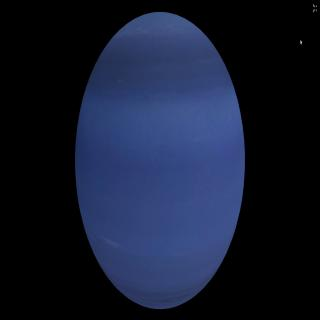

In [48]:
from IPython.display import Image

image_path = r"C:\Users\Helen\Nexforce_projects\planets\neptune.jpg"

# Display the image from pc
Image(filename=image_path)


In [62]:
image_path =  r"C:\Users\Helen\Nexforce_projects\planets\neptune.jpg"

planet = predict_class(image_path)
print("The predicted planet is: ", planet)

1/1 [==============================] - 1s 993ms/step
The predicted planet is:  Neptune


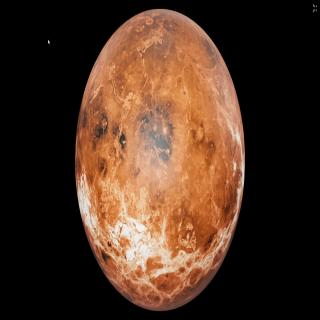

In [51]:
from IPython.display import Image

image_path = r"C:\Users\Helen\Nexforce_projects\planets\venus.jpg"

# Display the image from pc
Image(filename=image_path)


In [63]:
image_path = r"C:\Users\Helen\Nexforce_projects\planets\venus.jpg"

planet = predict_class(image_path)
print("The predicted planet is: ", planet)

1/1 [==============================] - 0s 137ms/step
The predicted planet is:  Venus


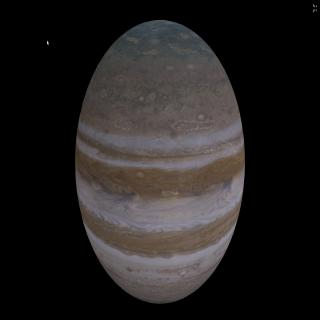

In [52]:
from IPython.display import Image

image_path = r"C:\Users\Helen\Nexforce_projects\planets\jupiter1.jpg"

# Display the image from pc
Image(filename=image_path)


In [66]:
image_path = r"C:\Users\Helen\Nexforce_projects\planets\jupiter1.jpg";

planet = predict_class(image_path)
print("The predicted planet is: ", planet)

1/1 [==============================] - 1s 1s/step
The predicted planet is:  Jupiter


"""paths 
neptune : r"C:\Users\Helen\Nexforce_projects\planets\neptune.jpg"
venus : r"C:\Users\Helen\Nexforce_projects\planets\venus.jpg"
jupiter : r"C:\Users\Helen\Nexforce_projects\planets\jupiter1.jpg"
mercury : r"C:\Users\Helen\Nexforce_projects\planets\mercury.jpg"
earth : r"C:\Users\Helen\Nexforce_projects\planets\earth.jpg"
uranus : r"C:\Users\Helen\Nexforce_projects\planets\uranus.jpg"
saturn : r"C:\Users\Helen\Nexforce_projects\planets\saturn.jpg"
"""
